In [1]:
import networkx as nx

# Create a directional graph
G = nx.read_edgelist('congress.edgelist', create_using=nx.DiGraph())

# Problem 1

In [9]:
hubs = {node: 1.0 for node in G.nodes()}
authorities = {node: 1.0 for node in G.nodes()}

num_iterations = 100

for _ in range(num_iterations):
    new_authorities = {node: 0.0 for node in G.nodes()}
    for node in G.nodes():
        for neighbor in G.predecessors(node):
            new_authorities[node] += hubs[neighbor]
    
    norm = sum(new_authorities.values())
    for node in new_authorities:
        new_authorities[node] /= norm
    
    new_hubs = {node: 0.0 for node in G.nodes()}
    for node in G.nodes():
        for neighbor in G.successors(node):
            new_hubs[node] += new_authorities[neighbor]
    
    norm = sum(new_hubs.values())
    for node in new_hubs:
        new_hubs[node] /= norm
    
    hubs = new_hubs
    authorities = new_authorities

In [10]:
pagerank = {node: 1.0 / len(G) for node in G.nodes()}

damping_factor = 0.85
num_iterations = 100

for _ in range(num_iterations):
    new_pagerank = {node: (1 - damping_factor) / len(G) for node in G.nodes()}
    for node in G.nodes():
        for neighbor in G.predecessors(node):
            new_pagerank[node] += damping_factor * pagerank[neighbor] / len(list(G.successors(neighbor)))
    
    pagerank = new_pagerank

print("PageRank:", pagerank)


PageRank: {'0': 0.0014221857769171776, '4': 0.0016717180114181759, '12': 0.0025564083777767565, '18': 0.0015808902789569543, '25': 0.002121580073908838, '30': 0.0014873905286593705, '46': 0.0024305905410555127, '55': 0.003286563400825805, '58': 0.0020260487847551857, '59': 0.0023446660837524967, '74': 0.002074294147876561, '76': 0.0010462669712270796, '77': 0.001571158698916755, '85': 0.0016279058254231153, '86': 0.0008629629930948454, '87': 0.0025879894320659873, '154': 0.002042519790553332, '168': 0.0006122223803133426, '341': 0.003110832588490571, '374': 0.003201586211551763, '401': 0.0050802548823515835, '3': 0.001330560541886976, '14': 0.0014078481551403868, '17': 0.0031814494329430953, '24': 0.0018291573979726675, '27': 0.0016032721007150051, '64': 0.001432433338611618, '79': 0.0018097211948223599, '84': 0.0013475720914156947, '88': 0.001629240930092342, '89': 0.0022695610564799087, '149': 0.003727702028249169, '179': 0.0020069282228779703, '197': 0.0038236159390925115, '213': 0.

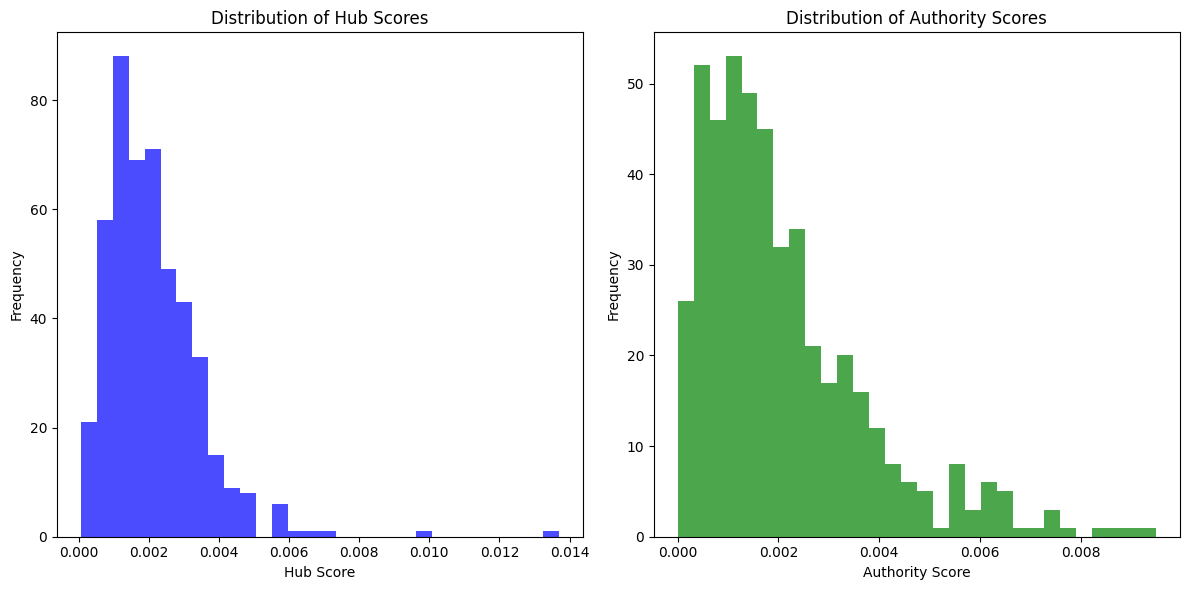

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(hubs.values(), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Hub Scores')
plt.xlabel('Hub Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(authorities.values(), bins=30, color='green', alpha=0.7)
plt.title('Distribution of Authority Scores')
plt.xlabel('Authority Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
from scipy.stats import pearsonr

hub_scores = list(hubs.values())
authority_scores = list(authorities.values())
pagerank_scores = list(pagerank.values())

hub_pagerank_corr, _ = pearsonr(hub_scores, pagerank_scores)
print("Pearson's correlation coefficient between hub scores and PageRank scores:", hub_pagerank_corr)

authority_pagerank_corr, _ = pearsonr(authority_scores, pagerank_scores)
print("Pearson's correlation coefficient between authority scores and PageRank scores:", authority_pagerank_corr)

Pearson's correlation coefficient between hub scores and PageRank scores: 0.5326410326963382
Pearson's correlation coefficient between authority scores and PageRank scores: 0.9632972714854124


Problem 2

In [2]:
import networkx as nx
import pandas as pd

edges_df = pd.read_csv('lastfm_asia_edges.csv')

lastfm_G = nx.Graph()

for index, row in edges_df.iterrows():
    lastfm_G.add_edge(row['node_1'], row['node_2'])

print(f"Number of nodes: {lastfm_G.number_of_nodes()}")
print(f"Number of edges: {lastfm_G.number_of_edges()}")

Number of nodes: 7624
Number of edges: 27806


In [ ]:
def girvan_newman(G, threshold=0.99, top_k=100):
    G_copy = G.copy()
    best_communities = list(nx.connected_components(G_copy))
    best_modularity = nx.algorithms.community.quality.modularity(G, best_communities)
    
    while G_copy.number_of_edges() > 0:
        # Calculate edge betweenness for all edges in the graph
        edge_betweenness = nx.edge_betweenness_centrality(G_copy, k=1000)
        
        # Find the edge with the highest betweenness
        edges_to_remove = sorted(edge_betweenness, key=edge_betweenness.get, reverse=True)[:int(len(edge_betweenness) * 0.05)]

        # Remove the edge with the highest betweenness
        G_copy.remove_edges_from(edges_to_remove)
                
        # Recalculate communities and modularity after removing the edge
        communities = list(nx.connected_components(G_copy))
        modularity = nx.algorithms.community.quality.modularity(G, communities)
        
        # Update best modularity and communities if the current one is better
        print(modularity)
        if modularity > best_modularity:
            best_modularity = modularity
            best_communities = communities
        
        if best_modularity >= threshold:
            break

    return best_communities, best_modularity

# Usage
best_communities, best_modularity = girvan_newman(lastfm_G)

0.005862505249726318
0.03180630049315342
0.04502060517748947
0.4585215752234987
0.691552361079213
0.7216513174021366
0.7114410061183203
0.6935621780564696
0.6843292132118173
0.6610825695562128
0.6410260029869927
0.6223099845841097
0.5984080540997649
0.580670354750689
0.5588491858509257
0.5366396003187052
0.5117530177917241
0.4899961720888269
0.4750940078613855
0.4583404186326912
0.43637749696886974
0.4139693363781483
0.38942676325295705
0.3706813090300456
0.35352314703084364
0.3318151111919186
0.3151954297882966
0.29954177330485177
0.2851260392691403


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f9f416d08c0>>
Traceback (most recent call last):
  File "/home/thomas/miniforge3/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


0.2713892827302766
0.2570217054064166
0.24014880015903697


In [9]:
print(f"Number of communities: {len(best_communities)}")
for i, community in enumerate(best_communities):
    print(f"Community {i+1}: {community}")

Number of communities: 1365
Community 1: {np.int64(0)}
Community 2: {np.int64(6148), np.int64(2056), np.int64(2061), np.int64(6172), np.int64(4126), np.int64(32), np.int64(6187), np.int64(46), np.int64(47), np.int64(4146), np.int64(6196), np.int64(6202), np.int64(6207), np.int64(2120), np.int64(6222), np.int64(6231), np.int64(4187), np.int64(95), np.int64(6240), np.int64(97), np.int64(4193), np.int64(2158), np.int64(4208), np.int64(116), np.int64(2168), np.int64(6266), np.int64(6268), np.int64(134), np.int64(6282), np.int64(4237), np.int64(2191), np.int64(2193), np.int64(4241), np.int64(4243), np.int64(2195), np.int64(6299), np.int64(6300), np.int64(6305), np.int64(6312), np.int64(4269), np.int64(174), np.int64(6329), np.int64(2243), np.int64(6342), np.int64(2248), np.int64(6346), np.int64(6352), np.int64(6357), np.int64(2264), np.int64(6363), np.int64(4330), np.int64(6378), np.int64(2299), np.int64(257), np.int64(4359), np.int64(6408), np.int64(6411), np.int64(6412), np.int64(267), np

In [3]:
G_copy = lastfm_G.copy()
best_communities = list(nx.connected_components(G_copy))
best_modularity = nx.algorithms.community.quality.modularity(G_copy, best_communities)


In [10]:
len(edge_betweenness)

27806

In [ ]:
def girvan_newman(G):
    G_copy = G.copy()
    communities = list(nx.connected_components(G_copy))
    
    while G_copy.number_of_edges() > 0:
        # Calculate edge betweenness for all edges in the graph
        edge_betweenness = nx.edge_betweenness_centrality(G_copy)
        
        # Find the edge with the highest betweenness
        edge_to_remove = max(edge_betweenness, key=edge_betweenness.get)
        
        # Remove the edge with the highest betweenness
        G_copy.remove_edge(*edge_to_remove)
        
        # Recalculate communities after removing the edge
        new_communities = list(nx.connected_components(G_copy))
        
        # If the number of communities has increased, update the communities
        if len(new_communities) > len(communities):
            communities = new_communities
    
    return communities

communities = girvan_newman(lastfm_G)


KeyboardInterrupt: 

In [ ]:
import networkx as nx
from networkx.algorithms.community import girvan_newman
from networkx.drawing.nx_agraph import graphviz_layout

import matplotlib.pyplot as plt

# Load Zachary's karate club graph
karate_club_graph = nx.karate_club_graph()

# Apply the Girvan-Newman algorithm
comp = girvan_newman(karate_club_graph)

# Get the first level of communities
communities = next(comp)

# Number of communities
num_communities = len(communities)
print(f"Number of communities: {num_communities}")

# Distribution of community sizes
community_sizes = [len(c) for c in communities]
print(f"Distribution of community sizes: {community_sizes}")

# Visualize the community structure
pos = nx.spring_layout(karate_club_graph)
colors = ['r', 'g', 'b', 'y', 'c', 'm']

for i, community in enumerate(communities):
    nx.draw_networkx_nodes(karate_club_graph, pos, nodelist=community, node_color=colors[i % len(colors)], label=f'Community {i+1}')
nx.draw_networkx_edges(karate_club_graph, pos)
nx.draw_networkx_labels(karate_club_graph, pos)
plt.legend()
plt.title("Community structure in Zachary's karate club network")
plt.show()

# Visualize the hierarchical tree

# Create a new graph to represent the hierarchical tree
hierarchical_tree = nx.Graph()

# Add nodes and edges to the hierarchical tree
for i, communities in enumerate(comp):
    for community in communities:
        hierarchical_tree.add_node(f"Level {i+1} - Community {list(communities).index(community)+1}", size=len(community))
        for node in community:
            hierarchical_tree.add_edge(node, f"Level {i+1} - Community {list(communities).index(community)+1}")

# Draw the hierarchical tree
pos = graphviz_layout(hierarchical_tree, prog='dot')
sizes = [hierarchical_tree.nodes[node]['size']*100 for node in hierarchical_tree.nodes()]
nx.draw(hierarchical_tree, pos, with_labels=True, node_size=sizes, node_color='lightblue', font_size=8)
plt.title("Hierarchical tree of communities")
plt.show()

In [ ]:
import os
import tarfile
import pandas as pd
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from node2vec import Node2Vec
import numpy as np

import urllib.request
import matplotlib.pyplot as plt

# Step 1: Download and extract the dataset
url = 'https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz'
dataset_dir = 'cora_dataset'
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)
    urllib.request.urlretrieve(url, os.path.join(dataset_dir, 'cora.tgz'))
    with tarfile.open(os.path.join(dataset_dir, 'cora.tgz'), 'r:gz') as tar:
        tar.extractall(path=dataset_dir)

# Step 2: Build the network from cora.cites file
cites_file = os.path.join(dataset_dir, 'cora.cites')
G = nx.read_edgelist(cites_file, create_using=nx.DiGraph(), nodetype=int)

# Step 3: Read the class labels from cora.content file
content_file = os.path.join(dataset_dir, 'cora.content')
content = pd.read_csv(content_file, sep='\t', header=None)
content.columns = ['node'] + [f'feat_{i}' for i in range(content.shape[1] - 2)] + ['label']
node_labels = content[['node', 'label']].set_index('node').to_dict()['label']

# Step 4: Apply the node2vec algorithm to generate node embeddings
def generate_node2vec_embeddings(G, dimensions=128, walk_length=80, num_walks=10, p=1, q=1):
    node2vec = Node2Vec(G, dimensions=dimensions, walk_length=walk_length, num_walks=num_walks, p=p, q=q, workers=4)
    model = node2vec.fit(window=10, min_count=1, batch_words=4)
    embeddings = {str(node): model.wv[str(node)] for node in G.nodes()}
    return embeddings

embeddings = generate_node2vec_embeddings(G)

# Step 5: Use logistic regression classifier on the obtained node embeddings
X = np.array([embeddings[str(node)] for node in G.nodes()])
y = np.array([node_labels[node] for node in G.nodes()])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

macro_f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print(f"Macro-F1 Score: {macro_f1}")
print(f"Accuracy: {accuracy}")

# Step 6: Plot the required graphs
def plot_metric_vs_parameter(metric, parameter_values, parameter_name, log_scale=False):
    plt.figure(figsize=(10, 6))
    plt.plot(parameter_values, metric, marker='o')
    plt.xlabel(parameter_name)
    plt.ylabel('Metric')
    if log_scale:
        plt.xscale('log', basex=2)
    plt.title(f'Metric vs {parameter_name}')
    plt.grid(True)
    plt.show()

# Example: Plot Macro-F1 vs log2(p)
p_values = [0.25, 0.5, 1, 2, 4]
macro_f1_scores = []

for p in p_values:
    embeddings = generate_node2vec_embeddings(G, p=p)
    X = np.array([embeddings[str(node)] for node in G.nodes()])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    macro_f1_scores.append(f1_score(y_test, y_pred, average='macro'))

plot_metric_vs_parameter(macro_f1_scores, p_values, 'log2(p)', log_scale=True)

# Repeat similar steps for other parameters and metrics